# Business Questions
1. Develop statistical learning models that can predict the success of a marketing campaign for
a given custome
2. Extract at least three insights that can assist the company in making informed decisions
regarding their marketing campaigns

# Data dictionary

* age =	Age
* job =	Type of job
* marital =	Marital status
* education = Level of education
* default =	Has credit in default
* housing =	Has a housing loan
* loan = Has a personal loan
* contact =	Contact communication type
* day_of_week =	Day of contact
* month = Month of contact
* duration = Last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
* campaign = Number of contacts performed during this campaign and for this client
* pdays = Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* previous = Number of contacts performed before this campaign and for this client 
* poutcome = Outcome of the previous marketing campaign
* emp.var.rate = employment variation rate - quarterly indicator (numeric)
* cons.price.idx = consumer price index - monthly indicator (numeric)    
* cons.conf.idx = consumer confidence index - monthly indicator (numeric) 
* euribor3m = euribor 3 month rate - daily indicator (numeric)
* nr.employed = number employed - quarterly indicator (numeric)
* y = Did the client subscribe to a Telecom plan?


# Preliminary stages

In [2]:
# Import library for reading .csv files
import pandas as pd # Data analysis and manipulation library
import re # Module used for string searching and manipulation
import io # Module used for reading and writing data
import numpy as np # Modules used for working with arrays
# (GeeksforGeeks, 2022)

In [3]:
# Read the CSV file
with open('TeleCom_Data-1.csv', 'r') as file:
    csv_text = file.read()

# Define the separator
separator = ';'

# Handle special symbols to split in the csv into seperate columns using regular expressions
csv_text = re.sub(r'";', separator, csv_text)
csv_text = re.sub(r';"', separator, csv_text)
csv_text = re.sub(r'";"', separator, csv_text)

# Convert the csv into a dataframe using pandas
df = pd.read_csv(io.StringIO(csv_text), sep=separator)

# Display the first few rows of the dataframe
df.head()

#(Grabbing CSV Information With Regex in Python, n.d.) 

,age;job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,"y"""""""
0,40;admin.,married,basic.6y,no,no,no,telephone,may,"mon""",151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no"""
1,56;services,married,high.school,no,no,yes,telephone,may,"mon""",307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no"""
2,45;services,married,basic.9y,unknown,no,no,telephone,may,"mon""",198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no"""
3,59;admin.,married,professional.course,no,no,no,telephone,may,"mon""",139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no"""
4,41;blue-collar,married,unknown,unknown,no,no,telephone,may,"mon""",217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no"""


In [4]:
# Split the 'age;job' column into two separate columns: 'age' and 'job'
df[['age', 'job']] = df["age;job"].str.split(';', expand=True)

# Drop the original 'age;job' column
df.drop(columns='age;job', inplace=True)

df.head()

,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,"y""""""",age,job
0,married,basic.6y,no,no,no,telephone,may,"mon""",151,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no""",40,admin.
1,married,high.school,no,no,yes,telephone,may,"mon""",307,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no""",56,services
2,married,basic.9y,unknown,no,no,telephone,may,"mon""",198,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no""",45,services
3,married,professional.course,no,no,no,telephone,may,"mon""",139,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no""",59,admin.
4,married,unknown,unknown,no,no,telephone,may,"mon""",217,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,"no""",41,blue-collar


In [5]:
# Get rid of the special symbols on rows in certain columns
df['y"""'] = df['y"""'].str.replace('"', "")
df['day_of_week'] = df['day_of_week'].str.replace('"', "")
df.head()

,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,"y""""""",age,job
0,married,basic.6y,no,no,no,telephone,may,mon,151,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40,admin.
1,married,high.school,no,no,yes,telephone,may,mon,307,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56,services
2,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,45,services
3,married,professional.course,no,no,no,telephone,may,mon,139,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,59,admin.
4,married,unknown,unknown,no,no,telephone,may,mon,217,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,41,blue-collar


In [6]:
# Rename the target variable column to get rid of special symbols
df.rename(columns={'y"""': 'y'}, inplace=True)
df.head()

,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age,job
0,married,basic.6y,no,no,no,telephone,may,mon,151,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40,admin.
1,married,high.school,no,no,yes,telephone,may,mon,307,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56,services
2,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,45,services
3,married,professional.course,no,no,no,telephone,may,mon,139,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,59,admin.
4,married,unknown,unknown,no,no,telephone,may,mon,217,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,41,blue-collar


In [7]:
# Check how many rows and columns, how many non-null values and datatype of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   marital         41180 non-null  object 
 1   education       41180 non-null  object 
 2   default         41180 non-null  object 
 3   housing         41180 non-null  object 
 4   loan            41180 non-null  object 
 5   contact         41180 non-null  object 
 6   month           41180 non-null  object 
 7   day_of_week     41180 non-null  object 
 8   duration        41180 non-null  int64  
 9   campaign        41180 non-null  int64  
 10  pdays           41180 non-null  int64  
 11  previous        41180 non-null  int64  
 12  poutcome        41180 non-null  object 
 13  emp.var.rate    41180 non-null  float64
 14  cons.price.idx  41180 non-null  float64
 15  cons.conf.idx   41180 non-null  float64
 16  euribor3m       41180 non-null  float64
 17  nr.employed     41180 non-null 

In [8]:
# Check for duplicates
df.duplicated().sum()

12

In [9]:
# Remove the duplicate rows while keeping the first occurence
df = df.drop_duplicates()

# Step 2: Data Preparation

- Select data
- Clean data
- Format data
- Split data


(Hotz, 2023)

In [10]:
# Define function to bin ages
def age_bins(age):
    try:
        age = int(age)  # Ensure age is an integer
        if 17 <= age <= 30:
            return 'Young'
        elif 31 <= age <= 45:
            return 'Young Adult'
        elif 46 <= age <= 60:
            return 'Middle Age'
        elif 61 <= age <= 75:
            return 'Senior'
        else:
            return 'Elderly'
    except ValueError:
        return 'Unknown'  # In case of non-numeric value, return 'Unknown'

# Apply the function to the 'age' column and drop the original 'age' column
df['age_group'] = df['age'].apply(age_bins).astype('category')
df.drop('age', axis=1, inplace=True)

# (How to Use if Else Statement in Python to Bin a Variable, n.d.)

In [11]:
# Exclude 'duration' from features and encode the target variable
X = df.drop(['y', 'duration'], axis=1)
y = df['y'].map({'yes': 1, 'no': 0})  # Binary encoding of the target variable

# Transform 'pdays' into 'contacted_recently'
df['contacted_recently'] = df['pdays'].replace({999: 0}).clip(upper=1)

# Drop the original 'pdays' column
df.drop('pdays', axis=1, inplace=True)

# Print new features
print(df['contacted_recently'].value_counts())
print(df.info())
# (Ali, 2023)
# (Wong, 2023)

0    39670
1     1498
Name: contacted_recently, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41168 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   marital             41168 non-null  object  
 1   education           41168 non-null  object  
 2   default             41168 non-null  object  
 3   housing             41168 non-null  object  
 4   loan                41168 non-null  object  
 5   contact             41168 non-null  object  
 6   month               41168 non-null  object  
 7   day_of_week         41168 non-null  object  
 8   duration            41168 non-null  int64   
 9   campaign            41168 non-null  int64   
 10  previous            41168 non-null  int64   
 11  poutcome            41168 non-null  object  
 12  emp.var.rate        41168 non-null  float64 
 13  cons.price.idx      41168 non-null  float64 
 14  cons.conf.idx       41168

In [12]:
from sklearn.compose import ColumnTransformer # Applies transformations to DataFrame columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder # Scales data
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from imblearn.over_sampling import SMOTE # Balances classes by oversampling the minority


# Define categorical features and the education order for ordinal encoding
nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age_group']
education_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']),
        ('cat', OneHotEncoder(drop='first'), nominal_features),
        ('ord', OrdinalEncoder(categories=[education_order]), ['education'])
    ])

# Split the data to avoid data leakage during the encoding and scaling steps
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Get feature names for numerical and categorical features
num_features = ['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(nominal_features)
ord_features = ['education']  

# Combine all feature names
all_features = num_features + list(cat_features) + ord_features

# Transform the training data and convert it to a DataFrame
X_train_preprocessed = pd.DataFrame(preprocessor.transform(X_train), columns=all_features)

# Transform the test data and convert it to a DataFrame
X_test_preprocessed = pd.DataFrame(preprocessor.transform(X_test), columns=all_features)

# Addressing imbalanced classes using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

# The data is now preprocessed and ready for model training
# (Ali, 2023)
# (Brownlee, 2021)
# (Wong, 2023)
# (Dong, 2023)
# (So, 2023)
# (OpenAI, 2023)

In [13]:
# Overview of the preprocessed training data
print(X_train_smote.info())
print(X_train_smote.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58426 entries, 0 to 58425
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   campaign               58426 non-null  float64
 1   previous               58426 non-null  float64
 2   emp.var.rate           58426 non-null  float64
 3   cons.price.idx         58426 non-null  float64
 4   cons.conf.idx          58426 non-null  float64
 5   euribor3m              58426 non-null  float64
 6   nr.employed            58426 non-null  float64
 7   job_blue-collar        58426 non-null  float64
 8   job_entrepreneur       58426 non-null  float64
 9   job_housemaid          58426 non-null  float64
 10  job_management         58426 non-null  float64
 11  job_retired            58426 non-null  float64
 12  job_self-employed      58426 non-null  float64
 13  job_services           58426 non-null  float64
 14  job_student            58426 non-null  float64
 15  jo

# Modeling

Things do to
* Make 3 step sequence similar to other assignments
* More metrics used by models
* Ensure more things use Maximum likelihood estimation
* Make table like lecturer shown in canvas slides
* Visualisations

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

# 1. Training the default Logistic Regression model
logreg_default = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg_default.fit(X_train_smote, y_train_smote)
y_pred_logreg = logreg_default.predict(X_test_preprocessed)

# 2. Evaluating the default model
print("Accuracy of Default Logistic Regression Model:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# (So, 2023)
# (OpenAI, 2023)

Accuracy of Default Logistic Regression Model: 0.8242652416808356

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7318
           1       0.34      0.63      0.44       916

    accuracy                           0.82      8234
   macro avg       0.65      0.74      0.67      8234
weighted avg       0.88      0.82      0.85      8234


Confusion Matrix:
[[6210 1108]
 [ 339  577]]


In [15]:
# 3. Hyperparameter tuning with GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.05, 0.1],
    'solver': ['liblinear', 'saga']
}
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train_smote, y_train_smote)
print("Best Hyperparameters:", grid_search_logreg.best_params_)

# 4. Training and evaluating the optimized model
logreg_optimized = LogisticRegression(**grid_search_logreg.best_params_, max_iter=5000)
logreg_optimized.fit(X_train_smote, y_train_smote)
y_pred_logreg_optimized = logreg_optimized.predict(X_test_preprocessed)
print("Accuracy of Optimized Logistic Regression Model:", accuracy_score(y_test, y_pred_logreg_optimized))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg_optimized))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_optimized))
# (Brownlee, 2020)
# (Sklearn.Linear_Model.LogisticRegression, n.d.)
# (So, 2023)
# (OpenAI, 2023)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy of Optimized Logistic Regression Model: 0.8266941948020403

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7318
           1       0.35      0.63      0.45       916

    accuracy                           0.83      8234
   macro avg       0.65      0.74      0.67      8234
weighted avg       0.88      0.83      0.85      8234


Confusion Matrix:
[[6230 1088]
 [ 339  577]]


In [16]:
from sklearn.model_selection import StratifiedKFold

# 5. Cross-validation with StratifiedKFold
stratified_kfold_logreg = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cross_val_accuracies_logreg = cross_val_score(logreg_optimized, X_train_smote, y_train_smote, cv=stratified_kfold_logreg, scoring='accuracy')

# Print mean accuracy and standard deviation from cross-validation
print("Mean Accuracy (Logistic Regression) with Stratified K-Fold CV:", cross_val_accuracies_logreg.mean())
print("Standard Deviation (Logistic Regression) with Stratified K-Fold CV:", cross_val_accuracies_logreg.std())

# 6. Final evaluation on the test set
y_pred_logreg_cross_val = logreg_optimized.predict(X_test_preprocessed)

# Print accuracy, classification report, and confusion matrix
print("\nFinal Evaluation on Test Set (Logistic Regression):")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_cross_val))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg_cross_val))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_cross_val))
# (Explain Stratified K Fold Cross Validation in ML in Python, 2022)
# (Sklearn.Model_Selection.StratifiedKFold, n.d.)
# (So, 2023)
# (OpenAI, 2023)

Mean Accuracy (Logistic Regression) with Stratified K-Fold CV: 0.7423580084210819
Standard Deviation (Logistic Regression) with Stratified K-Fold CV: 0.006472907196020094

Final Evaluation on Test Set (Logistic Regression):
Accuracy: 0.8266941948020403

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7318
           1       0.35      0.63      0.45       916

    accuracy                           0.83      8234
   macro avg       0.65      0.74      0.67      8234
weighted avg       0.88      0.83      0.85      8234


Confusion Matrix:
[[6230 1088]
 [ 339  577]]


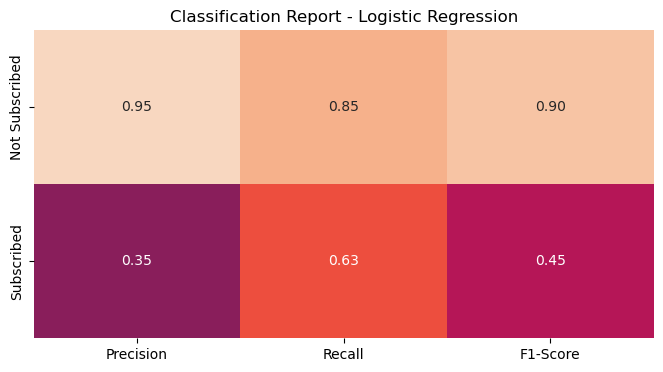

In [17]:
import seaborn as sns # Used for making statistical graphics
import matplotlib.pyplot as plt # Used to make visualisations

# Classification report data
report = classification_report(y_test, y_pred_logreg_cross_val, target_names=["Not Subscribed", "Subscribed"], output_dict=True)

# Create a DataFrame with precision, recall, and F1-score for both classes
metrics_df = pd.DataFrame({
    "Precision": [report["Not Subscribed"]["precision"], report["Subscribed"]["precision"]],
    "Recall": [report["Not Subscribed"]["recall"], report["Subscribed"]["recall"]],
    "F1-Score": [report["Not Subscribed"]["f1-score"], report["Subscribed"]["f1-score"]]
}, index=["Not Subscribed", "Subscribed"])

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df, annot=True, fmt=".2f", vmin=0, vmax=1, cbar=False)
plt.title('Classification Report - Logistic Regression')
plt.show()
# (So, 2023)

In [18]:
log_reg_coef = pd.DataFrame({'Feature': X_train_smote.columns, 'Coefficient': logreg_optimized.coef_[0]})

# Calculate odds ratios from the coefficients for interpretation
log_reg_coef['Odds Ratio'] = np.exp(log_reg_coef['Coefficient'])

# Display sorted coefficients for interpretation
sorted_coef = log_reg_coef.sort_values(by='Odds Ratio', ascending=False)
print(sorted_coef)
# (Simple Logistic Regression With Python - heds.nz, n.d.)
# (OpenAI, 2023)

                  Feature  Coefficient  Odds Ratio
42       poutcome_success     2.029565    7.610775
32              month_mar     1.447757    4.253564
3          cons.price.idx     1.152502    3.166104
5               euribor3m     0.595486    1.813912
41   poutcome_nonexistent     0.533323    1.704587
28              month_aug     0.449947    1.568228
6             nr.employed     0.372451    1.451287
11            job_retired     0.228949    1.257278
19         marital_single     0.150293    1.162174
4           cons.conf.idx     0.132969    1.142215
18        marital_married     0.129000    1.137690
14            job_student     0.120143    1.127658
29              month_dec     0.094503    1.099112
30              month_jul     0.069809    1.072304
36              month_sep     0.043993    1.044975
35              month_oct     0.038462    1.039211
24            housing_yes     0.012665    1.012745
47              education     0.006299    1.006319
1                previous     0

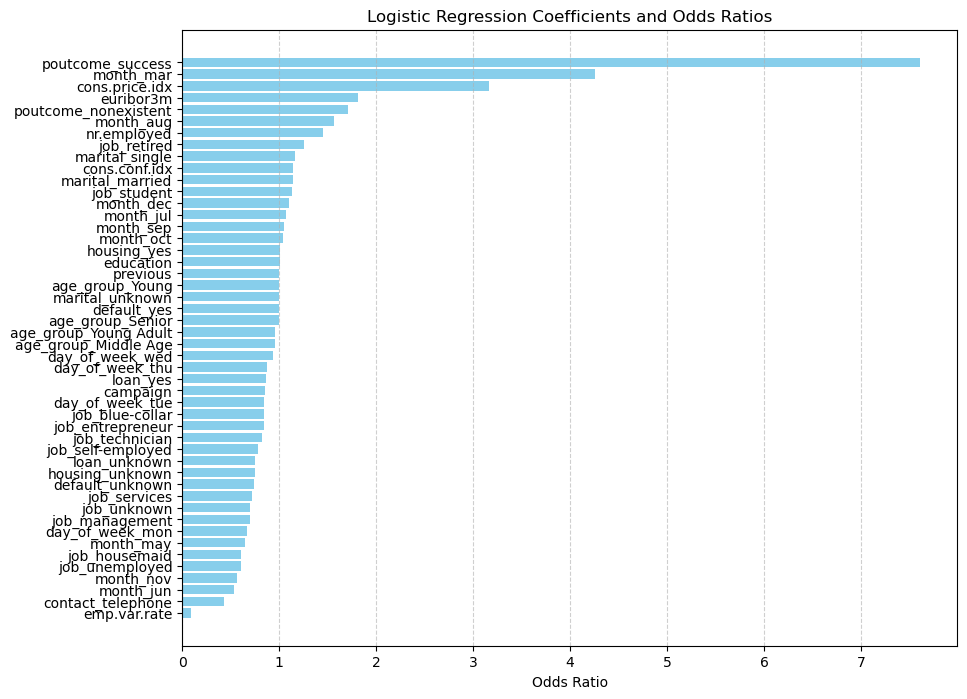

In [19]:
# Sort the coefficients by odds ratio in descending order
sorted_coef = log_reg_coef.sort_values(by='Odds Ratio', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_coef['Feature'], sorted_coef['Odds Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.title('Logistic Regression Coefficients and Odds Ratios')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest odds ratio at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
# (So, 2023)
# (OpenAI, 2023)

## Gradient Boosting Classifier

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Training the default Gradient Boosting model
gbc_default = GradientBoostingClassifier(random_state=42)
gbc_default.fit(X_train_smote, y_train_smote)
y_pred_gbc = gbc_default.predict(X_test_preprocessed)

# 2. Evaluating the default model
print("Accuracy of Default Gradient Boosting Classifier Model:", accuracy_score(y_test, y_pred_gbc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbc))
# (So, 2023)

Accuracy of Default Gradient Boosting Classifier Model: 0.8834102501821715

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7318
           1       0.48      0.46      0.47       916

    accuracy                           0.88      8234
   macro avg       0.70      0.70      0.70      8234
weighted avg       0.88      0.88      0.88      8234


Confusion Matrix:
[[6854  464]
 [ 496  420]]


In [22]:
# 3. Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0]
}
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_gbc.fit(X_train_smote, y_train_smote)
print("Best Hyperparameters:", grid_search_gbc.best_params_)

# 4. Training and evaluating the optimized model
gbc_optimized = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)
gbc_optimized.fit(X_train_smote, y_train_smote)
y_pred_gbc_optimized = gbc_optimized.predict(X_test_preprocessed)
print("Accuracy of Optimized Gradient Boosting Classifier Model:", accuracy_score(y_test, y_pred_gbc_optimized))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc_optimized))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbc_optimized))

# (Jain, 2022)
# (Sklearn.Ensemble.GradientBoostingClassifier, n.d.)
# (So, 2023)
# (OpenAI, 2023)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Accuracy of Optimized Gradient Boosting Classifier Model: 0.8972552829730386

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7318
           1       0.57      0.33      0.41       916

    accuracy                           0.90      8234
   macro avg       0.74      0.65      0.68      8234
weighted avg       0.88      0.90      0.88      8234


Confusion Matrix:
[[7090  228]
 [ 618  298]]


In [23]:
# 5. Cross-validation with StratifiedKFold
stratified_kfold_gbc = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cross_val_accuracies_gbc = cross_val_score(gbc_optimized, X_train_smote, y_train_smote, cv=stratified_kfold_gbc, scoring='accuracy')

# Print mean accuracy and standard deviation from cross-validation
print("Mean Accuracy (Gradient Boosting Classifier) with Stratified K-Fold CV:", cross_val_accuracies_gbc.mean())
print("Standard Deviation (Gradient Boosting Classifier) with Stratified K-Fold CV:", cross_val_accuracies_gbc.std())

# 6. Final evaluation on the test set
y_pred_gbc_cross_val = gbc_optimized.predict(X_test_preprocessed)

# Print accuracy, classification report, and confusion matrix
print("\nFinal Evaluation on Test Set (Gradient Boosting Classifier):")
print("Accuracy:", accuracy_score(y_test, y_pred_gbc_cross_val))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc_cross_val))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbc_cross_val))
# (Explain Stratified K Fold Cross Validation in ML in Python, 2022)
# (Sklearn.Model_Selection.StratifiedKFold, n.d.)
# (So, 2023)
# (OpenAI, 2023)

Mean Accuracy (Gradient Boosting Classifier) with Stratified K-Fold CV: 0.9365693919572884
Standard Deviation (Gradient Boosting Classifier) with Stratified K-Fold CV: 0.0037986147368300914

Final Evaluation on Test Set (Gradient Boosting Classifier):
Accuracy: 0.8972552829730386

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7318
           1       0.57      0.33      0.41       916

    accuracy                           0.90      8234
   macro avg       0.74      0.65      0.68      8234
weighted avg       0.88      0.90      0.88      8234


Confusion Matrix:
[[7090  228]
 [ 618  298]]


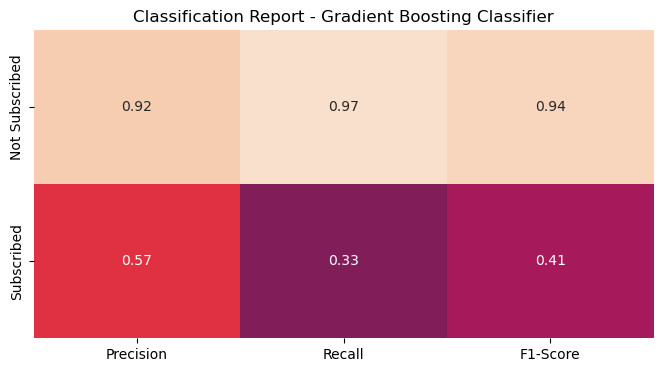

In [24]:
# Classification report data
report_gbc = classification_report(y_test, y_pred_gbc_cross_val, target_names=["Not Subscribed", "Subscribed"], output_dict=True)

# Create a DataFrame with precision, recall, and F1-score for both classes
metrics_df_gbc = pd.DataFrame({
    "Precision": [report_gbc["Not Subscribed"]["precision"], report_gbc["Subscribed"]["precision"]],
    "Recall": [report_gbc["Not Subscribed"]["recall"], report_gbc["Subscribed"]["recall"]],
    "F1-Score": [report_gbc["Not Subscribed"]["f1-score"], report_gbc["Subscribed"]["f1-score"]]
}, index=["Not Subscribed", "Subscribed"])

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df_gbc, annot=True, fmt=".2f", vmin=0, vmax=1, cbar=False)
plt.title('Classification Report - Gradient Boosting Classifier')
plt.show()
# (So, 2023)

In [25]:
# Trained Gradient Boosting Classifier model after hyperparameter tuning
gbm_feature_importance = pd.DataFrame({
    'Feature': X_train_smote.columns, 
    'Importance': gbc_optimized.feature_importances_
})

# Display sorted feature importances for interpretation
print(gbm_feature_importance.sort_values(by='Importance', ascending=False))
# (Gradient Boosting Regression, n.d.)
# (So, 2023)
# (OpenAI, 2023)

                  Feature  Importance
6             nr.employed    0.230810
0                campaign    0.172329
5               euribor3m    0.098800
24            housing_yes    0.064929
21        default_unknown    0.058022
4           cons.conf.idx    0.052148
26               loan_yes    0.041963
27      contact_telephone    0.039545
37        day_of_week_mon    0.032350
42       poutcome_success    0.022709
18        marital_married    0.017140
15         job_technician    0.016873
35              month_oct    0.014551
40        day_of_week_wed    0.014393
38        day_of_week_thu    0.013745
39        day_of_week_tue    0.013537
7         job_blue-collar    0.011567
13           job_services    0.010745
3          cons.price.idx    0.008515
10         job_management    0.008259
43   age_group_Middle Age    0.006924
19         marital_single    0.005473
46  age_group_Young Adult    0.004818
47              education    0.004800
33              month_may    0.003645
45        ag

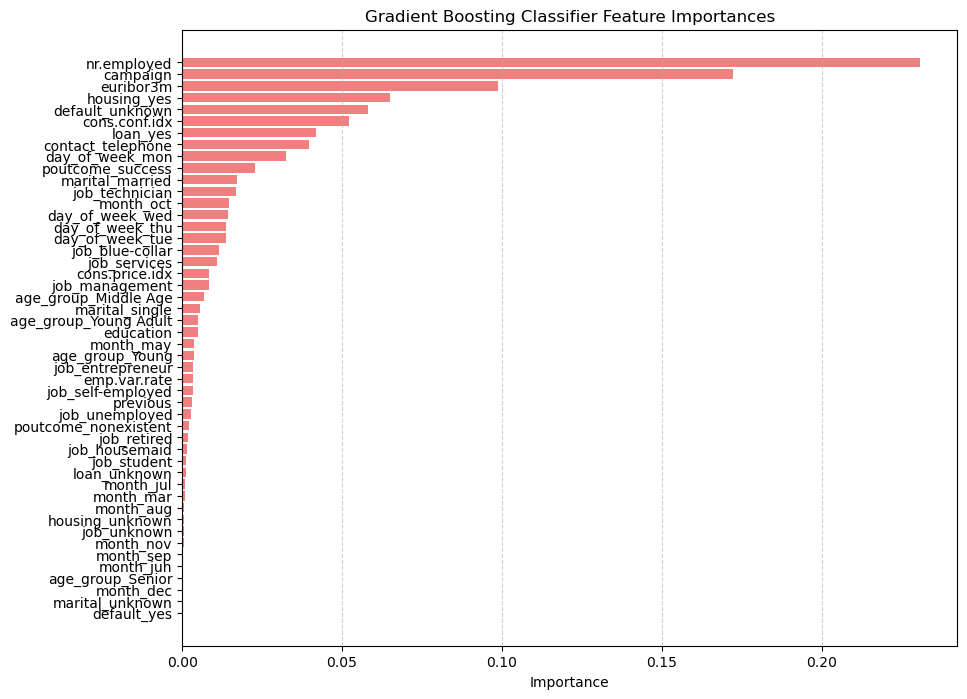

In [26]:
# Sort the feature importances in descending order
sorted_importance = gbm_feature_importance.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_importance['Feature'], sorted_importance['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Gradient Boosting Classifier Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
# (So, 2023)
# (OpenAI, 2023)

## Neural Network

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_smote.shape[1], activation=activation))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# 1. Training the default Neural Network model
model_default = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
model_default.fit(X_train_smote, y_train_smote)
y_pred_nn = model_default.predict(X_test_preprocessed)

# 2. Evaluating the default model
y_pred_nn = (y_pred_nn > 0.5).astype(int)  # Convert probabilities to binary outputs
print("Accuracy of Default Neural Network Model:", accuracy_score(y_test, y_pred_nn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

# (Brownlee, 2022)
# (So, 2023)
# (OpenAI, 2023)

C:\Users\ans_b\AppData\Local\Temp\ipykernel_24476\2335471687.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_default = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


258/258 [==============================] - 0s 813us/step
Accuracy of Default Neural Network Model: 0.8371386932232208

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      7318
           1       0.34      0.51      0.41       916

    accuracy                           0.84      8234
   macro avg       0.64      0.69      0.66      8234
weighted avg       0.87      0.84      0.85      8234


Confusion Matrix:
[[6426  892]
 [ 449  467]]


In [28]:
# 3. Hyperparameter tuning with GridSearchCV
param_grid = {
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}
grid_search_nn = GridSearchCV(estimator=KerasClassifier(build_fn=create_model, verbose=0), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_nn.fit(X_train_smote, y_train_smote)
print("Best Hyperparameters:", grid_search_nn.best_params_)

# 4. Training and evaluating the optimized model
model_optimized = KerasClassifier(build_fn=create_model, verbose=0, **grid_search_nn.best_params_)
model_optimized.fit(X_train_smote, y_train_smote)
y_pred_nn_optimized = model_optimized.predict(X_test_preprocessed)
y_pred_nn_optimized = (y_pred_nn_optimized > 0.5).astype(int)  # Convert probabilities to binary outputs
print("Accuracy of Optimized Neural Network Model:", accuracy_score(y_test, y_pred_nn_optimized))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn_optimized))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn_optimized))
# (Rosebrock, 2021)
# (So, 2023)
# (OpenAI, 2023)

C:\Users\ans_b\AppData\Local\Temp\ipykernel_24476\79119607.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_search_nn = GridSearchCV(estimator=KerasClassifier(build_fn=create_model, verbose=0), param_grid=param_grid, cv=5, scoring='accuracy')


366/366 [==============================] - 0s 825us/step
Best Hyperparameters: {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'optimizer': 'adam'}


C:\Users\ans_b\AppData\Local\Temp\ipykernel_24476\79119607.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_optimized = KerasClassifier(build_fn=create_model, verbose=0, **grid_search_nn.best_params_)


258/258 [==============================] - 0s 821us/step
Accuracy of Optimized Neural Network Model: 0.8345882924459558

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7318
           1       0.34      0.52      0.41       916

    accuracy                           0.83      8234
   macro avg       0.64      0.70      0.66      8234
weighted avg       0.87      0.83      0.85      8234


Confusion Matrix:
[[6399  919]
 [ 443  473]]


In [29]:
# 5. Cross-validation with StratifiedKFold
stratified_kfold_nn = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracies_nn = cross_val_score(model_optimized, X_train_smote, y_train_smote, cv=stratified_kfold_nn, scoring='accuracy')

# Print mean accuracy and standard deviation from cross-validation
print("Mean Accuracy (Neural Network) with Stratified K-Fold CV:", np.mean(cross_val_accuracies_nn))
print("Standard Deviation (Neural Network) with Stratified K-Fold CV:", np.std(cross_val_accuracies_nn))

# 6. Final evaluation on the test set
y_pred_nn_cross_val = model_optimized.predict(X_test_preprocessed)
y_pred_nn_cross_val = (y_pred_nn_cross_val > 0.5).astype(int)  # Convert probabilities to binary outputs

# Print accuracy, classification report, and confusion matrix
print("\nFinal Evaluation on Test Set (Neural Network):")
print("Accuracy:", accuracy_score(y_test, y_pred_nn_cross_val))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn_cross_val))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn_cross_val))
# (Explain Stratified K Fold Cross Validation in ML in Python, 2022)
# (Sklearn.Model_Selection.StratifiedKFold, n.d.)
# (So, 2023)
# (OpenAI, 2023)

366/366 [==============================] - 0s 822us/step
Mean Accuracy (Neural Network) with Stratified K-Fold CV: 0.8581967033394358
Standard Deviation (Neural Network) with Stratified K-Fold CV: 0.0054912662950696665
258/258 [==============================] - 0s 825us/step

Final Evaluation on Test Set (Neural Network):
Accuracy: 0.8345882924459558

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7318
           1       0.34      0.52      0.41       916

    accuracy                           0.83      8234
   macro avg       0.64      0.70      0.66      8234
weighted avg       0.87      0.83      0.85      8234


Confusion Matrix:
[[6399  919]
 [ 443  473]]


258/258 [==============================] - 0s 823us/step


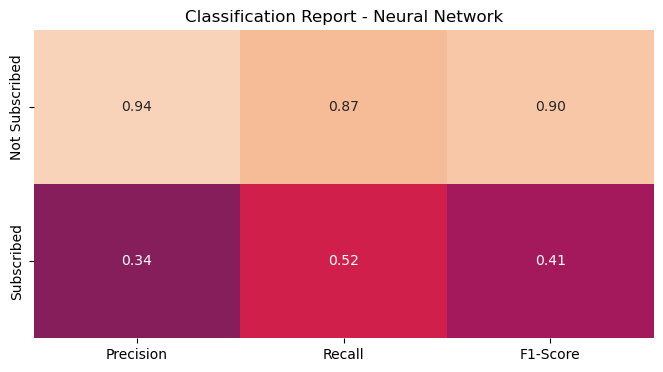

In [31]:
# 6. Final evaluation on the test set
y_pred_nn_cross_val = model_optimized.predict(X_test_preprocessed)
y_pred_nn_cross_val = (y_pred_nn_cross_val > 0.5).astype(int)  # Convert probabilities to binary outputs

# Classification report data
report_nn = classification_report(y_test, y_pred_nn_cross_val, target_names=["Not Subscribed", "Subscribed"], output_dict=True)

# Create a DataFrame with precision, recall, and F1-score for both classes
metrics_df_nn = pd.DataFrame({
    "Precision": [report_nn["Not Subscribed"]["precision"], report_nn["Subscribed"]["precision"]],
    "Recall": [report_nn["Not Subscribed"]["recall"], report_nn["Subscribed"]["recall"]],
    "F1-Score": [report_nn["Not Subscribed"]["f1-score"], report_nn["Subscribed"]["f1-score"]]
}, index=["Not Subscribed", "Subscribed"])

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df_nn, annot=True, fmt=".2f", vmin=0, vmax=1, cbar=False)
plt.title('Classification Report - Neural Network')
plt.show()
# (So, 2023)

## Evaluation

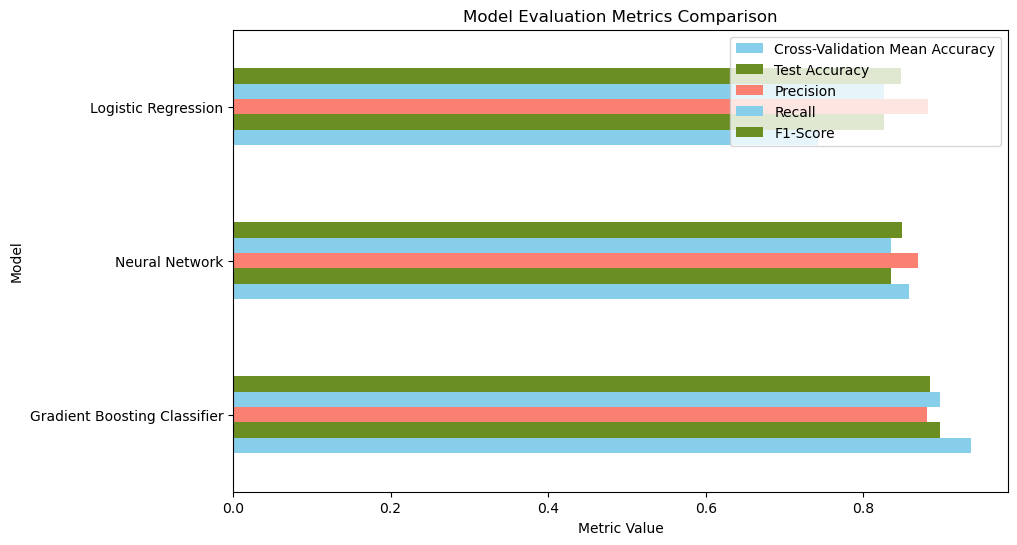

                          Model  Cross-Validation Mean Accuracy  \
1  Gradient Boosting Classifier                        0.936569   
2                Neural Network                        0.858197   
0           Logistic Regression                        0.742358   

   Cross-Validation STD  Test Accuracy  Precision    Recall  F1-Score  
1              0.003799       0.897255   0.880522  0.897255  0.884695  
2              0.005491       0.834588   0.869011  0.834588  0.848865  
0              0.006473       0.826694   0.881441  0.826694  0.847167  


In [34]:
# Create a summary DataFrame
models_evaluation = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gradient Boosting Classifier', 'Neural Network'],
    'Cross-Validation Mean Accuracy': [
        cross_val_accuracies_logreg.mean(), 
        cross_val_accuracies_gbc.mean(), 
        cross_val_accuracies_nn.mean()
    ],
    'Cross-Validation STD': [
        cross_val_accuracies_logreg.std(), 
        cross_val_accuracies_gbc.std(), 
        cross_val_accuracies_nn.std()
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_logreg_cross_val),
        accuracy_score(y_test, y_pred_gbc_cross_val),
        accuracy_score(y_test, y_pred_nn_cross_val)
    ],
    'Precision': [
        classification_report(y_test, y_pred_logreg_cross_val, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_gbc_cross_val, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_nn_cross_val, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, y_pred_logreg_cross_val, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_gbc_cross_val, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_nn_cross_val, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, y_pred_logreg_cross_val, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_gbc_cross_val, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_nn_cross_val, output_dict=True)['weighted avg']['f1-score']
    ]
})

# Create bar plots for all metrics in a single subplot
fig, axes = plt.subplots(figsize=(10, 6))

# Define colors for the bars
colors = ['skyblue', 'olivedrab', 'salmon']

# Plot all metrics in a single subplot
models_evaluation_sorted.plot(kind='barh', ax=axes, x='Model', y=['Cross-Validation Mean Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score'], color=colors)

# Set axis labels and title
axes.set_xlabel('Metric Value')
axes.set_ylabel('Model')
axes.set_title('Model Evaluation Metrics Comparison')

# Display the plot
plt.show()

# Print the results table
print(models_evaluation_sorted)
# (So, 2023)
# (OpenAI, 2023)